<a href="https://colab.research.google.com/github/Manasi200/Track-release-prediction/blob/main/MSD_Song_release_year_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Machine Learning Model to predict given song's release year using regression and neural networks***

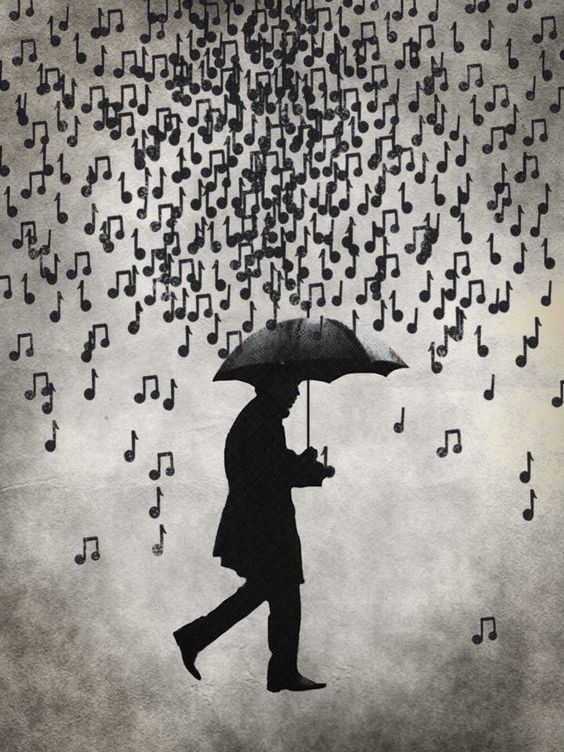

In [ ]:
# Here are several helpful packages to load in :

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation
import tensorflow as tf


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input/"))

import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

# Any results you write to the current directory are saved as output.

Files in '/content': ['.config', 'year_prediction (1).csv', 'drive', 'sample_data']


In [ ]:
data = pd.read_csv("year_prediction (1).csv")
data = data.rename(index=str, columns={"label":"year"})

Text(0, 0.5, 'Number of songs')

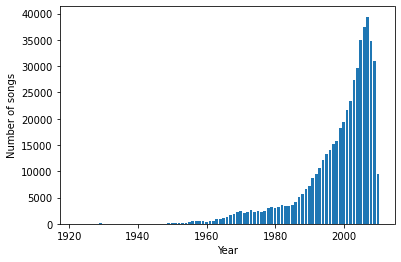

In [ ]:
nsongs = {}
for y in range(1922,2012):
    nsongs[y] = len(data[data.year==y])
yrs = range(1922,2011)
values = [nsongs[y] for y in yrs]
plt.bar(yrs, values, align='center')
plt.xlabel("Year")
plt.ylabel("Number of songs")

In [ ]:
# separate input attributes and output into different dataframes
X = data.iloc[:,1:]
Y = data.iloc[:,0]

# Train set
X_train = X.iloc[0:463715,:]
y_train = Y.iloc[0:463715]

# Validation set
X_test = X.iloc[463715:,:]
y_test = Y.iloc[463715:]

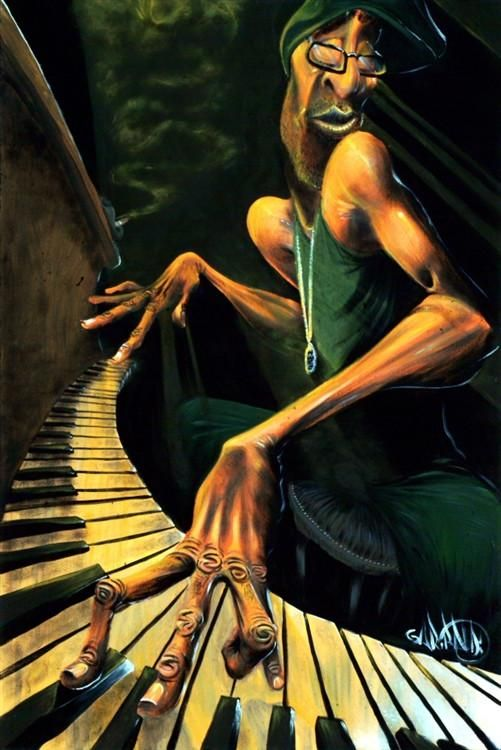

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the train set and the test set.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns=X_train.columns)

In [ ]:
X_train.describe()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
count,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,...,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000
mean,0.691393,0.469181,0.496357,0.350035,0.395117,0.358260,0.515310,0.397887,0.477290,0.426607,...,0.354631,0.487984,0.368845,0.657332,0.568014,0.466481,0.600205,0.343815,0.503517,0.347715
std,0.100947,0.071570,0.056527,0.036814,0.051474,0.063671,0.040431,0.044802,0.038783,0.063964,...,0.025093,0.019768,0.024255,0.019886,0.026819,0.016738,0.024350,0.019045,0.012446,0.023989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.634471,0.431166,0.464150,0.328296,0.363307,0.314100,0.492040,0.371622,0.455227,0.384236,...,0.340913,0.480545,0.356429,0.648426,0.556221,0.459283,0.589716,0.333782,0.498175,0.336685
50%,0.705958,0.479041,0.499274,0.345928,0.396288,0.350109,0.516244,0.398215,0.477664,0.425654,...,0.349484,0.490259,0.366313,0.656434,0.568816,0.466181,0.600938,0.341908,0.502698,0.346333
75%,0.765257,0.517551,0.530164,0.367222,0.427238,0.393690,0.539991,0.424327,0.500152,0.468346,...,0.362847,0.497755,0.378403,0.665694,0.581546,0.473821,0.611202,0.351684,0.507992,0.356798
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


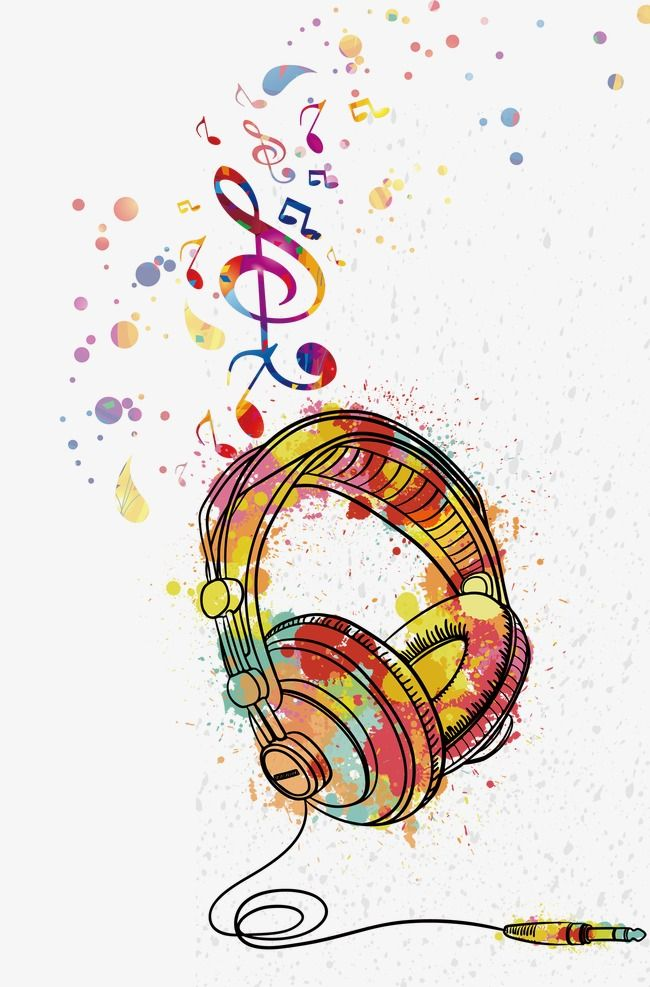

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the train set and the test set.
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
X_train_std = pd.DataFrame(X_train_std,columns=X_train.columns)
X_train_std.describe()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
count,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,...,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05
mean,7.705192e-16,-2.094639e-15,1.388052e-16,-1.356692e-15,-8.803834e-16,2.346386e-15,-6.112316e-16,4.601099e-16,-3.234423e-16,1.907321e-15,...,1.839145e-16,7.891946e-16,-4.752370e-15,-1.124314e-15,-4.589413e-15,-8.155785e-15,-2.553677e-15,-1.843993e-15,-7.508392e-15,4.828068e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.849083e+00,-6.555536e+00,-8.780881e+00,-9.508272e+00,-7.675981e+00,-5.626720e+00,-1.274530e+01,-8.881098e+00,-1.230653e+01,-6.669490e+00,...,-1.413267e+01,-2.468577e+01,-1.520687e+01,-3.305562e+01,-2.117983e+01,-2.786972e+01,-2.464943e+01,-1.805304e+01,-4.045652e+01,-1.449495e+01
25%,-5.638876e-01,-5.311584e-01,-5.697513e-01,-5.905186e-01,-6.179717e-01,-6.935698e-01,-5.755554e-01,-5.862542e-01,-5.688679e-01,-6.624309e-01,...,-5.466954e-01,-3.763002e-01,-5.118673e-01,-4.478800e-01,-4.397373e-01,-4.299846e-01,-4.307504e-01,-5.268242e-01,-4.292140e-01,-4.598088e-01
50%,1.442775e-01,1.377638e-01,5.161888e-02,-1.115648e-01,2.275066e-02,-1.280171e-01,2.309700e-02,7.320083e-03,9.665689e-03,-1.489907e-02,...,-2.051342e-01,1.151222e-01,-1.043898e-01,-4.517888e-02,2.990574e-02,-1.788398e-02,3.008970e-02,-1.001326e-01,-6.574410e-02,-5.763047e-02
75%,7.317100e-01,6.758454e-01,5.980758e-01,4.668744e-01,6.240130e-01,5.564446e-01,6.104375e-01,5.901695e-01,5.894924e-01,6.525343e-01,...,3.273959e-01,4.942984e-01,3.940738e-01,4.204911e-01,5.045541e-01,4.385694e-01,4.516087e-01,4.131805e-01,3.595684e-01,3.786469e-01
max,3.057122e+00,7.416766e+00,8.909792e+00,1.765551e+01,1.175114e+01,1.007897e+01,1.198797e+01,1.343956e+01,1.347767e+01,8.964296e+00,...,2.571906e+01,2.590152e+01,2.602152e+01,1.723191e+01,1.610766e+01,3.187494e+01,1.641892e+01,3.445501e+01,3.989141e+01,2.719132e+01


In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.90)

# We fit to only our training set
pca.fit(X_train_std)
# Print number of components generated
pca.n_components_

55

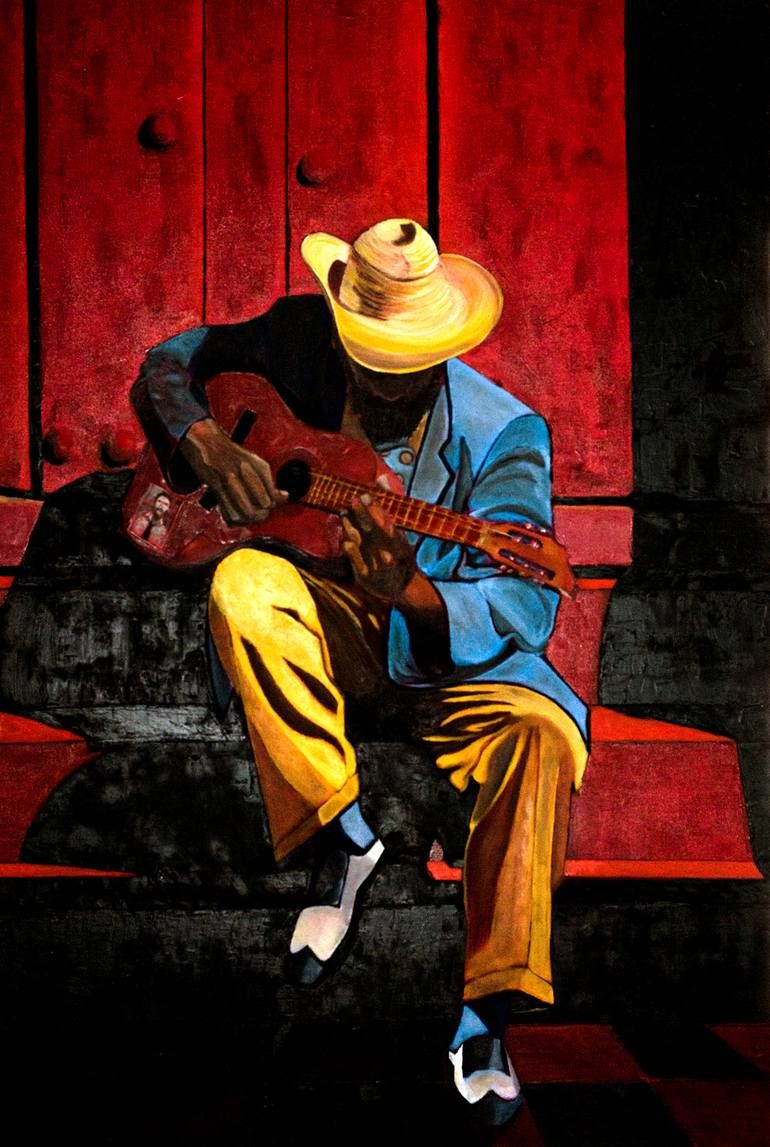

In [ ]:
X_train_proc = pca.transform(X_train_std)
X_test_proc = pca.transform(X_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_train_proc = y_train - min(y_train)
y_test_proc = y_test - min(y_test)
# y_train_proc

In [ ]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Lambda, Dropout
# from tensorflow.python.keras.initializers import Initializer
# from tensorflow.python.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
y_train_hot = to_categorical(y_train_proc, 90)
y_test_hot = to_categorical(y_test_proc, 90)

In [ ]:
print(X_train_proc.shape)
print(y_test_hot.shape)

(463715, 55)
(51630, 90)


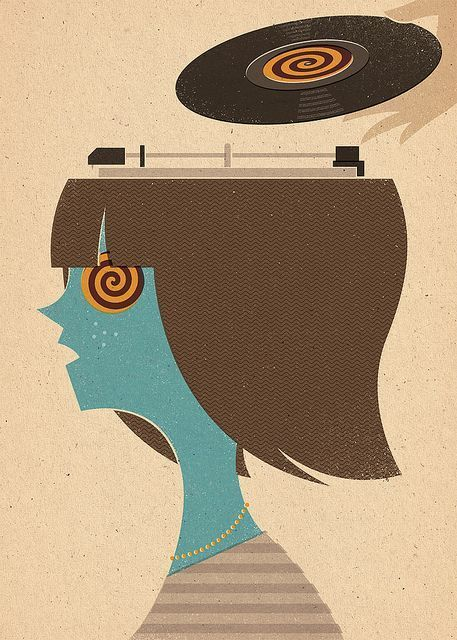

In [ ]:
def plot(history):
    epochs = range(1, len(history.history['loss']) + 1)
    plt.plot(epochs, history.history['mean_absolute_error'], label='train');
    plt.plot(epochs, history.history['val_mean_absolute_error'], label='val');
    plt.xlabel('epoch');
    plt.ylabel('mae');
    plt.legend();
    plt.show();

In [ ]:
model1 = Sequential()
model1.add(Dense(55, input_shape=(55,)))
model1.add(Dense(110))
model1.add(Dense(90, activation='softmax'))

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [ ]:
model1.compile(optimizer='adam'
             , loss='categorical_crossentropy'
             , metrics=['accuracy'])

In [ ]:
fit1 = model1.fit(x=X_train_proc, y=y_train_hot
          , epochs=5
          , batch_size=64
          , validation_data=(X_test_proc, y_test_hot)
          , callbacks=[learning_rate_reduction])

Epoch 1/5
7246/7246 [==============================] - 17s 2ms/step - loss: 3.3523 - accuracy: 0.0749 - val_loss: 3.8099 - val_accuracy: 0.0092
Epoch 2/5
7246/7246 [==============================] - 16s 2ms/step - loss: 3.3129 - accuracy: 0.0772 - val_loss: 3.8370 - val_accuracy: 0.0063
Epoch 3/5
7246/7246 [==============================] - 16s 2ms/step - loss: 3.3096 - accuracy: 0.0775 - val_loss: 3.8471 - val_accuracy: 0.0054
Epoch 4/5
7246/7246 [==============================] - 18s 2ms/step - loss: 3.3078 - accuracy: 0.0775 - val_loss: 3.8403 - val_accuracy: 0.0066
Epoch 5/5
7246/7246 [==============================] - 16s 2ms/step - loss: 3.3067 - accuracy: 0.0774 - val_loss: 3.8154 - val_accuracy: 0.0145


In [ ]:
# plot(fit1)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 55)                3080      
_________________________________________________________________
dense_1 (Dense)              (None, 110)               6160      
_________________________________________________________________
dense_2 (Dense)              (None, 90)                9990      
Total params: 19,230
Trainable params: 19,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
preds = model1.predict_classes(X_test_proc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(np.array(y_test_proc))
print(preds)
np.mean(np.absolute((preds-np.array(y_test_proc))))

[80 76 78 ... 79 79 78]
[83 83 83 ... 83 81 84]


11.49153592872361

In [ ]:
model2 = Sequential()
model2.add(Dense(55, input_shape=(55,), activation='relu'))
model2.add(Dense(1))

In [ ]:
learning_rate_reduction1 = ReduceLROnPlateau(monitor='mean_absolute_error', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [ ]:
model2.compile(optimizer='adam'
             , loss='mse'
             , metrics=['mae'])

In [ ]:
fit2 = model2.fit(x=X_train_proc, y=y_train_proc
          , epochs=10
          , batch_size=64
          , validation_data=(X_test_proc, y_test_proc)
          , callbacks=[learning_rate_reduction1])

Epoch 1/10
7246/7246 [==============================] - 22s 3ms/step - loss: 446.3362 - mae: 13.7859 - val_loss: 124.2896 - val_mae: 7.8094
Epoch 2/10
7246/7246 [==============================] - 19s 3ms/step - loss: 96.6502 - mae: 7.2190 - val_loss: 117.3119 - val_mae: 7.5127
Epoch 3/10
7246/7246 [==============================] - 12s 2ms/step - loss: 93.0120 - mae: 7.0227 - val_loss: 117.6465 - val_mae: 7.5537
Epoch 4/10
7246/7246 [==============================] - 12s 2ms/step - loss: 91.6330 - mae: 6.9524 - val_loss: 118.5735 - val_mae: 7.5946
Epoch 5/10
7246/7246 [==============================] - 12s 2ms/step - loss: 90.9231 - mae: 6.9168 - val_loss: 121.3005 - val_mae: 7.7063
Epoch 6/10
7246/7246 [==============================] - 12s 2ms/step - loss: 90.4385 - mae: 6.8941 - val_loss: 113.7093 - val_mae: 7.3662
Epoch 7/10
7246/7246 [==============================] - 12s 2ms/step - loss: 90.0986 - mae: 6.8763 - val_loss: 118.1206 - val_mae: 7.5525
Epoch 8/10
7246/7246 [==========

In [ ]:
preds_model_rms = model2.predict(X_test_proc)
np.mean(np.absolute(preds_model_rms.T-np.array(y_test_proc)))

7.491006307696132

In [ ]:
# plot(fit2)

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score
# mean_squared_error(predictions_linearRegr, np.array(y_test_proc))
es = EarlyStopping(monitor='val_mean_absolute_error', patience=2, restore_best_weights=True)

In [ ]:
model3 = Sequential()
model3.add(Dense(55, input_shape=(55,), activation='relu'))
model3.add(Dense(110, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1))

model3.compile(optimizer='adam'
             , loss='mse'
             , metrics=['mae'])

In [ ]:
fit3 = model3.fit(x=X_train_proc, y=y_train_proc
          , epochs=10
          , batch_size=64
          , validation_data=(X_test_proc, y_test_proc)
          , callbacks=[learning_rate_reduction1, es])

Epoch 1/10
7246/7246 [==============================] - 15s 2ms/step - loss: 216.0389 - mae: 10.3153 - val_loss: 122.4347 - val_mae: 7.7902
Epoch 2/10
7246/7246 [==============================] - 15s 2ms/step - loss: 116.7509 - mae: 8.1886 - val_loss: 122.5594 - val_mae: 7.6923
Epoch 3/10
7246/7246 [==============================] - 14s 2ms/step - loss: 113.3091 - mae: 8.0492 - val_loss: 129.2750 - val_mae: 8.1266
Epoch 4/10
7246/7246 [==============================] - 15s 2ms/step - loss: 111.3235 - mae: 7.9600 - val_loss: 115.3073 - val_mae: 7.4895
Epoch 5/10
7246/7246 [==============================] - 15s 2ms/step - loss: 109.4581 - mae: 7.8737 - val_loss: 111.3860 - val_mae: 7.3053
Epoch 6/10
7246/7246 [==============================] - 15s 2ms/step - loss: 108.1398 - mae: 7.8140 - val_loss: 118.5338 - val_mae: 7.6643
Epoch 7/10
7246/7246 [==============================] - 15s 2ms/step - loss: 106.9382 - mae: 7.7643 - val_loss: 111.9842 - val_mae: 7.3872
Epoch 8/10
7246/7246 [====

In [ ]:
preds_model_rms = model3.predict(X_test_proc)
np.mean(np.absolute(preds_model_rms.T-np.array(y_test_proc)))

7.045889282078792

In [ ]:
# plot(fit3)

In [ ]:
model3.compile(optimizer='adam'
             , loss='mse'
             , metrics=['mae'])
fit3 = model3.fit(x=X_train_proc, y=y_train_proc
          , epochs=10
          , batch_size=128
          , validation_data=(X_test_proc, y_test_proc)
          , callbacks=[learning_rate_reduction1, es])

Epoch 1/10
3623/3623 [==============================] - 10s 3ms/step - loss: 102.4826 - mae: 7.5598 - val_loss: 118.4859 - val_mae: 7.7079
Epoch 2/10
3623/3623 [==============================] - 9s 3ms/step - loss: 101.6820 - mae: 7.5199 - val_loss: 112.8530 - val_mae: 7.4130
Epoch 3/10
3623/3623 [==============================] - 9s 3ms/step - loss: 101.0413 - mae: 7.4913 - val_loss: 109.9325 - val_mae: 7.3401
Epoch 4/10
3623/3623 [==============================] - 10s 3ms/step - loss: 100.4428 - mae: 7.4685 - val_loss: 115.9184 - val_mae: 7.4445
Epoch 5/10
3623/3623 [==============================] - 9s 3ms/step - loss: 99.8897 - mae: 7.4463 - val_loss: 114.5399 - val_mae: 7.5115
Epoch 6/10
3623/3623 [==============================] - 9s 3ms/step - loss: 99.0817 - mae: 7.4033 - val_loss: 109.6141 - val_mae: 7.1705
Epoch 7/10
3623/3623 [==============================] - 9s 3ms/step - loss: 98.9589 - mae: 7.3961 - val_loss: 110.7770 - val_mae: 7.3112
Epoch 8/10
3623/3623 [=============

In [ ]:
preds_model_rms = model3.predict(X_test_proc)
np.mean(np.absolute(preds_model_rms.T-np.array(y_test_proc)))

7.275722163642028

In [ ]:
# plot(fit3)

In [ ]:
# from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
# adam = optimizers.Adam()

In [ ]:
model3.compile(optimizer='RMSprop'
             , loss='mse'
             , metrics=['mae'])
fit4 = model3.fit(x=X_train_proc, y=y_train_proc
          , epochs=10
          , batch_size=64
          , validation_data=(X_test_proc, y_test_proc)
          , callbacks=[learning_rate_reduction1, es])

Epoch 1/10
7246/7246 [==============================] - 15s 2ms/step - loss: 97.5748 - mae: 7.3247 - val_loss: 111.9361 - val_mae: 7.3338
Epoch 2/10
7246/7246 [==============================] - 14s 2ms/step - loss: 97.2066 - mae: 7.2984 - val_loss: 114.2527 - val_mae: 7.4656
Epoch 3/10
7246/7246 [==============================] - 14s 2ms/step - loss: 96.9398 - mae: 7.2799 - val_loss: 109.7982 - val_mae: 7.2539
Epoch 4/10
7246/7246 [==============================] - 14s 2ms/step - loss: 96.4895 - mae: 7.2639 - val_loss: 121.5675 - val_mae: 7.7367
Epoch 5/10
7246/7246 [==============================] - 14s 2ms/step - loss: 95.8210 - mae: 7.2279 - val_loss: 101.2932 - val_mae: 6.9029
Epoch 6/10
7246/7246 [==============================] - 14s 2ms/step - loss: 95.4258 - mae: 7.2069 - val_loss: 97.3788 - val_mae: 6.7149
Epoch 7/10
7246/7246 [==============================] - 14s 2ms/step - loss: 94.9842 - mae: 7.1830 - val_loss: 112.7849 - val_mae: 7.4120
Epoch 8/10
7246/7246 [=============

In [ ]:
preds_model_rms = model3.predict(X_test_proc)
np.mean(np.absolute(preds_model_rms.T-np.array(y_test_proc)))

7.079644645056982

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.round_(np.array(preds_model_rms), decimals=-1), np.round_(np.array(y_test_proc), decimals=-1))

,1920,1931,1942,1953,1964,1975,1986,1997,2008,2019
1920,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,0,0,0,0
1942,0,0,0,0,0,0,0,0,0,0
1953,0,0,0,0,0,0,0,0,0,0
1964,0,0,0,0,0,0,0,0,1,0
1975,1,0,0,2,14,18,8,8,11,0
1986,16,24,23,67,378,351,575,560,477,0
1997,9,22,48,199,1066,1402,3798,4981,4921,0
2008,0,0,0,34,332,605,1609,8651,21291,0
2019,0,0,0,0,0,1,4,12,111,0


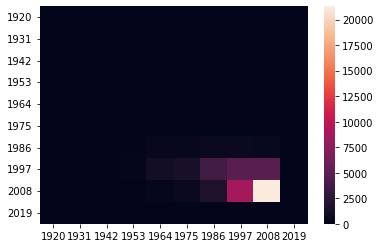

In [ ]:
import seaborn as sns
ind = list(range(1920,2030,11))
df_heat = pd.DataFrame(cm, index=ind, columns=ind)
len(ind)
# lab = pd.unique(df_heat[0])
sns.heatmap(df_heat)
df_heat
# df_plot.transpose().corr()
# cm.shape

In [ ]:
# THE END